To generate the pickle file:

    cd CEO/src
    python -m main.azure_rl --get-training-progress ../notebooks/progress.pkl


In [70]:
# Load the pickle file
import pickle

with open("progress.pkl", "rb") as f:
    data = pickle.load(f)
    
print("data keys", data.keys())
progress_df = data["progress"]
trainings_df = data["trainings"]
trainings_df.sort_values("final_pct_win", inplace=True, ascending=False)
display(trainings_df.shape)
display(progress_df.shape)

data keys dict_keys(['trainings', 'progress'])


(10, 6)

(14701, 7)

In [71]:
trainings_df

,training_id,learning_type,start,end,finished,final_pct_win
0,tid_a2b5cc9c-07ef-436f-bf62-fe4157ee4739,qlearning,2022-02-13 02:49:54.718684,None,False,None
1,tid_25dfc3aa-ed47-4689-9044-2e3d9574f48b,qlearning,2022-02-13 02:49:56.304109,None,False,None
2,tid_69ec49a0-d410-4c5e-b999-1993d3f78bed,qlearning,2022-02-13 02:50:01.079705,None,False,None
3,tid_7c0a5a5d-5a1d-45e3-874c-52722ff9d7c3,qlearning,2022-02-13 02:50:04.353930,None,False,None
4,tid_d4fff200-5043-43c6-a956-82187a050160,qlearning,2022-02-13 02:50:11.166353,None,False,None
5,tid_32e071e6-b0ac-412f-891d-548f9b11b81c,qlearning,2022-02-13 02:49:56.304107,None,False,None
6,tid_9b2b07b4-02f7-4d70-8d03-bdd4562950ee,qlearning,2022-02-13 02:52:51.048121,None,False,None
7,tid_69274842-b08a-4637-9bd8-c900ed0be01c,qlearning,2022-02-13 02:52:59.881628,None,False,None
8,tid_b11b0924-de35-40db-b944-0d99ded3955d,qlearning,2022-02-13 02:52:51.049940,None,False,None
9,tid_3cafbb4f-a9c6-450c-826d-cbd5bfcb4c32,qlearning,2022-02-13 02:52:59.881628,None,False,None


In [72]:
progress_df

,training_id,episode,avg_rewards,recent_rewards,states_visited,explore_rate,pct_win
0,tid_25dfc3aa-ed47-4689-9044-2e3d9574f48b,20000,NaN,NaN,NaN,NaN,0.48340
1,tid_25dfc3aa-ed47-4689-9044-2e3d9574f48b,40000,NaN,NaN,NaN,NaN,0.56840
2,tid_25dfc3aa-ed47-4689-9044-2e3d9574f48b,42000,-0.223286,-0.0688,70721.0,0.206351,NaN
3,tid_25dfc3aa-ed47-4689-9044-2e3d9574f48b,60000,NaN,NaN,NaN,NaN,0.61980
4,tid_25dfc3aa-ed47-4689-9044-2e3d9574f48b,80000,NaN,NaN,NaN,NaN,0.64550
...,...,...,...,...,...,...,...
14696,tid_d4fff200-5043-43c6-a956-82187a050160,17544000,0.414037,0.4100,636823.0,0.005871,NaN
14697,tid_d4fff200-5043-43c6-a956-82187a050160,17560000,NaN,NaN,NaN,NaN,0.69960
14698,tid_d4fff200-5043-43c6-a956-82187a050160,17580000,NaN,NaN,NaN,NaN,0.70300
14699,tid_d4fff200-5043-43c6-a956-82187a050160,17582000,0.414022,0.4156,637042.0,0.005424,NaN


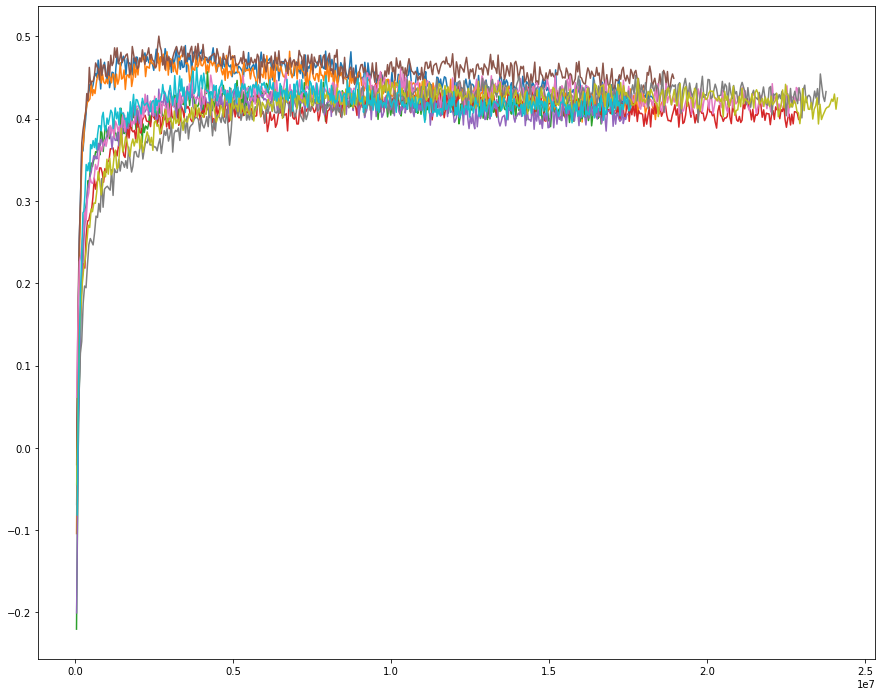

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plot_df = progress_df.pivot(index="episode", columns="training_id", values="recent_rewards")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='')

plt.show()

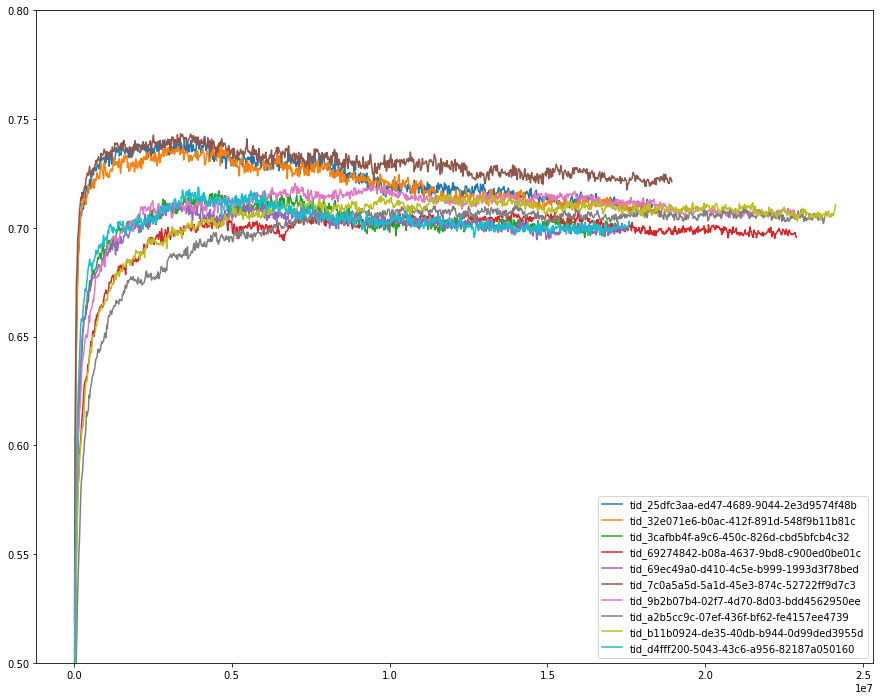

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.pivot(index="episode", columns="training_id", values="pct_win")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='', label=column)

plt.ylim(0.5, 0.8)
plt.legend()
plt.show()

In [75]:
plot_df

training_id,tid_25dfc3aa-ed47-4689-9044-2e3d9574f48b,tid_32e071e6-b0ac-412f-891d-548f9b11b81c,tid_3cafbb4f-a9c6-450c-826d-cbd5bfcb4c32,tid_69274842-b08a-4637-9bd8-c900ed0be01c,tid_69ec49a0-d410-4c5e-b999-1993d3f78bed,tid_7c0a5a5d-5a1d-45e3-874c-52722ff9d7c3,tid_9b2b07b4-02f7-4d70-8d03-bdd4562950ee,tid_a2b5cc9c-07ef-436f-bf62-fe4157ee4739,tid_b11b0924-de35-40db-b944-0d99ded3955d,tid_d4fff200-5043-43c6-a956-82187a050160
episode,,,,,,,,,,
20000,0.4834,0.48860,0.38195,0.46590,0.3765,0.51875,0.47755,0.3969,0.43975,0.41665
36000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40000,0.5684,0.57145,0.46890,0.51745,0.4814,0.60705,0.54135,0.4505,0.49045,0.50790
42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24078000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70755,NaN
24100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70840,NaN


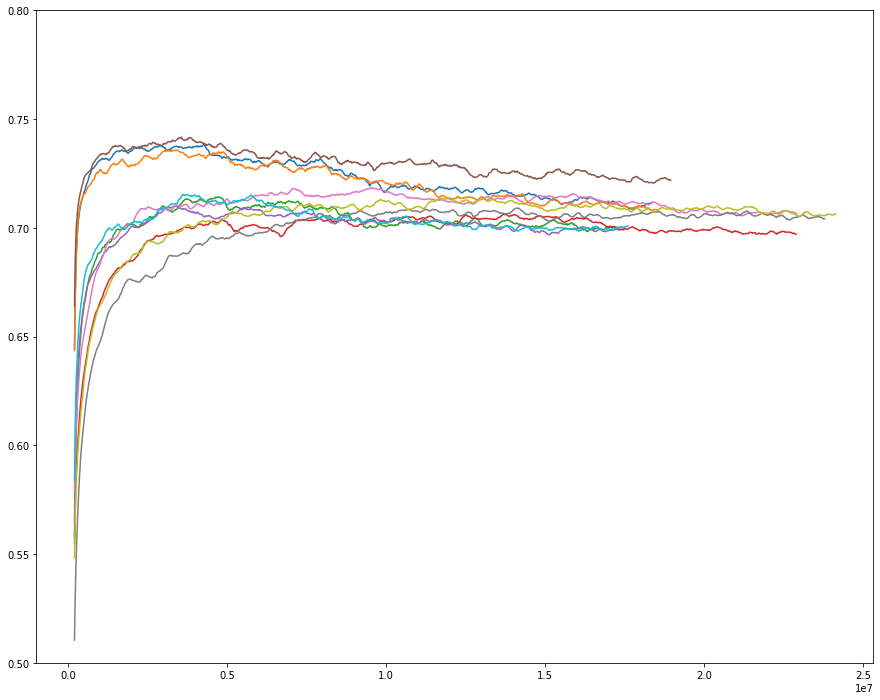

In [76]:
# Plot moving average of test stats

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.pivot(index="episode", columns="training_id", values="pct_win")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)
    
    x = xs[smask]
    y = series[smask]
    
    y_moving_average = y.rolling(10).mean()

    plt.plot(x, y_moving_average, linestyle='-', marker='', label=column)

plt.ylim(0.5, 0.8)
# plt.legend()
plt.show()